<a href="https://colab.research.google.com/github/anisaiue/Text-Preprocessing/blob/main/Text-Preprocessing-BDC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Library Used
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from nltk.corpus import stopwords
from nltk.tokenize import TweetTokenizer
 
import string
import re
from string import punctuation
from collections import Counter

In [ ]:
dfBDC = pd.read_excel('Data Latih BDC.xlsx')
dfBDC.head()

,ID,label,tanggal,judul,narasi,nama file gambar
0,71,1,2020-08-17 00:00:00,Pemakaian Masker Menyebabkan Penyakit Legionna...,A caller to a radio talk show recently shared ...,71.jpg
1,461,1,2020-07-17 00:00:00,Instruksi Gubernur Jateng tentang penilangan ...,Yth.Seluruh Anggota Grup Sesuai Instruksi Gube...,461.png
2,495,1,2020-07-13 00:00:00,Foto Jim Rohn: Jokowi adalah presiden terbaik ...,Jokowi adalah presiden terbaik dlm sejarah ban...,495.png
3,550,1,2020-07-08 00:00:00,"ini bukan politik, tapi kenyataan Pak Jokowi b...","Maaf Mas2 dan Mbak2, ini bukan politik, tapi k...",550.png
4,681,1,2020-06-24 00:00:00,Foto Kadrun kalo lihat foto ini panas dingin,Kadrun kalo lihat foto ini panas dingin . .,681.jpg


## Cleansing Data 

In [ ]:
import string, re
 
def cleansing(data):
    # lower text
    data=data.lower()
    # hapus punctuation
    remove=string.punctuation
    translator = str.maketrans(remove, ' '*len(remove))
    data=data.translate(translator)
    # remove ASCII dan unicode
    data = data.encode('ascii', 'ignore').decode('utf-8')
    data = re.sub(r'[^\x00-\x7f]',r'', data)
    # remove newline
    data = data.replace('\n',' ')
    #remove number
    data = re.sub(r'\d+','',data)
    #remove whitespace
    data=" ".join(data.split())
    # Remove single space remaining at the front of the tweet.
    data = data.lstrip(' ') 
    # Remove characters beyond Basic Multilingual Plane (BMP) of Unicode:
    data = ''.join(c for c in data if c <= '\uFFFF') 
    # Remove hyperlinks
    data = re.sub(r'https?:\/\/.*\/\w*', '', data)
    # Remove hashtags
    data = re.sub(r'#\w*', '', data)
    # Remove Punctuation and split 's, 't, 've with a space for filter
    data = re.sub(r'[' + punctuation.replace('@', '') + ']+', ' ', data)
    # Remove words with 2 or fewer letters
    data = re.sub(r'\b\w{1,2}\b', '', data)
    # Remove HTML special entities (e.g. &amp;)
    data = re.sub(r'\&\w*;', '', data)
    # Remove tickers
    data = re.sub(r'\$\w*', '', data)
    return data

In [ ]:
 
dfBDC['judul']=dfBDC['judul'].apply(lambda x: re.sub(r'(pasu)','(palsu)', str(x)))
dfBDC['judul']=dfBDC['judul'].apply(lambda x: re.sub(r'(sdg)','(sedang)', str(x)))
dfBDC['judul']=dfBDC['judul'].apply(lambda x: re.sub(r'(dgn)','(dengan)', str(x)))
dfBDC['judul']=dfBDC['judul'].apply(lambda x: re.sub(r'(nyamar)','(menyamar)', str(x)))
dfBDC['judul']=dfBDC['judul'].apply(lambda x: re.sub(r'(ngak)','(tidak)', str(x)))
dfBDC['judul']=dfBDC['judul'].apply(lambda x: re.sub(r'(smua)','(semua)', str(x)))
dfBDC['judul']=dfBDC['judul'].apply(lambda x: re.sub(r'(ato)','(atau)', str(x)))
dfBDC['judul']=dfBDC['judul'].apply(lambda x: re.sub(r'(utk)','(untuk)', str(x)))
dfBDC['judul']=dfBDC['judul'].apply(lambda x: re.sub(r'(yg)','(yang)', str(x)))

In [ ]:
 
dfBDC['narasi']=dfBDC['narasi'].apply(lambda x: re.sub(r'(pasu)','(palsu)', str(x)))
dfBDC['narasi']=dfBDC['narasi'].apply(lambda x: re.sub(r'(sdg)','(sedang)', str(x)))
dfBDC['narasi']=dfBDC['narasi'].apply(lambda x: re.sub(r'(dgn)','(dengan)', str(x)))
dfBDC['narasi']=dfBDC['narasi'].apply(lambda x: re.sub(r'(nyamar)','(menyamar)', str(x)))
dfBDC['narasi']=dfBDC['narasi'].apply(lambda x: re.sub(r'(ngak)','(tidak)', str(x)))
dfBDC['narasi']=dfBDC['narasi'].apply(lambda x: re.sub(r'(smua)','(semua)', str(x)))
dfBDC['narasi']=dfBDC['narasi'].apply(lambda x: re.sub(r'(ato)','(atau)', str(x)))
dfBDC['narasi']=dfBDC['narasi'].apply(lambda x: re.sub(r'(utk)','(untuk)', str(x)))
dfBDC['narasi']=dfBDC['narasi'].apply(lambda x: re.sub(r'(yg)','(yang)', str(x)))

In [ ]:
dfBDC['judul']=dfBDC['judul'].apply(lambda x: re.sub(r'(untk)','(untuk)', str(x)))
dfBDC['judul']=dfBDC['judul'].apply(lambda x: re.sub(r'(sdh)','(sudah)', str(x)))
dfBDC['judul']=dfBDC['judul'].apply(lambda x: re.sub(r'(gak)','(tidak)', str(x)))
dfBDC['judul']=dfBDC['judul'].apply(lambda x: re.sub(r'(hoaks)','(hoax)', str(x)))
dfBDC['judul']=dfBDC['judul'].apply(lambda x: re.sub(r'(moga)','(semoga)', str(x)))
dfBDC['judul']=dfBDC['judul'].apply(lambda x: re.sub(r'(perjlnn)','(perjalanan)', str(x)))
dfBDC['judul']=dfBDC['judul'].apply(lambda x: re.sub(r'(prett)'," ", str(x)))
dfBDC['judul']=dfBDC['judul'].apply(lambda x: re.sub(r'(karna)','(karena)', str(x)))
dfBDC['judul']=dfBDC['judul'].apply(lambda x: re.sub(r'(kalo)','(kalau)', str(x)))
dfBDC['judul']=dfBDC['judul'].apply(lambda x: re.sub(r'(malem)','(malam)', str(x)))
dfBDC['judul']=dfBDC['judul'].apply(lambda x: re.sub(r'(tdk)','(tidak)', str(x)))
dfBDC['judul']=dfBDC['judul'].apply(lambda x: re.sub(r'(anehhhhhh)','(aneh)', str(x)))
dfBDC['judul']=dfBDC['judul'].apply(lambda x: re.sub(r'(sungguhhhhhh)','(sungguh)', str(x)))
dfBDC['judul']=dfBDC['judul'].apply(lambda x: re.sub(r'(tekening)','(rekening)', str(x)))
dfBDC['judul']=dfBDC['judul'].apply(lambda x: re.sub(r'(jt)','(juta)', str(x)))
dfBDC['judul']=dfBDC['judul'].apply(lambda x: re.sub(r'(lg)','(lagi)', str(x)))
dfBDC['judul']=dfBDC['judul'].apply(lambda x: re.sub(r'(jg)','(juga)', str(x)))

In [ ]:
dfBDC['narasi']=dfBDC['narasi'].apply(lambda x: re.sub(r'(untk)','(untuk)', str(x)))
dfBDC['narasi']=dfBDC['narasi'].apply(lambda x: re.sub(r'(sdh)','(sudah)', str(x)))
dfBDC['narasi']=dfBDC['narasi'].apply(lambda x: re.sub(r'(gak)','(tidak)', str(x)))
dfBDC['narasi']=dfBDC['narasi'].apply(lambda x: re.sub(r'(hoaks)','(hoax)', str(x)))
dfBDC['narasi']=dfBDC['narasi'].apply(lambda x: re.sub(r'(moga)','(semoga)', str(x)))
dfBDC['narasi']=dfBDC['narasi'].apply(lambda x: re.sub(r'(perjlnn)','(perjalanan)', str(x)))
dfBDC['narasi']=dfBDC['narasi'].apply(lambda x: re.sub(r'(prett)'," ", str(x)))
dfBDC['narasi']=dfBDC['narasi'].apply(lambda x: re.sub(r'(karna)','(karena)', str(x)))
dfBDC['narasi']=dfBDC['narasi'].apply(lambda x: re.sub(r'(kalo)','(kalau)', str(x)))
dfBDC['narasi']=dfBDC['narasi'].apply(lambda x: re.sub(r'(malem)','(malam)', str(x)))
dfBDC['narasi']=dfBDC['narasi'].apply(lambda x: re.sub(r'(tdk)','(tidak)', str(x)))
dfBDC['narasi']=dfBDC['narasi'].apply(lambda x: re.sub(r'(anehhhhhh)','(aneh)', str(x)))
dfBDC['narasi']=dfBDC['narasi'].apply(lambda x: re.sub(r'(sungguhhhhhh)','(sungguh)', str(x)))
dfBDC['narasi']=dfBDC['narasi'].apply(lambda x: re.sub(r'(tekening)','(rekening)', str(x)))
dfBDC['narasi']=dfBDC['narasi'].apply(lambda x: re.sub(r'(jt)','(juta)', str(x)))
dfBDC['narasi']=dfBDC['narasi'].apply(lambda x: re.sub(r'(lg)','(lagi)', str(x)))
dfBDC['narasi']=dfBDC['narasi'].apply(lambda x: re.sub(r'(jg)','(juga)', str(x)))

In [ ]:
dfBDC['judul']=dfBDC['judul'].apply(lambda x: re.sub(r'(penghianatbuah)','(pengkhianat)(buah)', str(x)))
dfBDC['judul']=dfBDC['judul'].apply(lambda x: re.sub(r'(cinaorganisasi)','(china)(organisasi)', str(x)))
dfBDC['judul']=dfBDC['judul'].apply(lambda x: re.sub(r'(bahayakisah)','(bahaya)(kisah)', str(x)))
dfBDC['judul']=dfBDC['judul'].apply(lambda x: re.sub(r'(ingatkasih)','(ingat)(kasih)', str(x)))
dfBDC['judul']=dfBDC['judul'].apply(lambda x: re.sub(r'(ndak)','(tidak)', str(x)))
dfBDC['judul']=dfBDC['judul'].apply(lambda x: re.sub(r'(nurut)','(menurut)', str(x)))
dfBDC['judul']=dfBDC['judul'].apply(lambda x: re.sub(r'(ahirnya)','(akhirnya)', str(x)))
dfBDC['judul']=dfBDC['judul'].apply(lambda x: re.sub(r'(hotelsekarang)','(hotel)(sekarang)', str(x)))
dfBDC['judul']=dfBDC['judul'].apply(lambda x: re.sub(r'(mesumpasang)','(mesum)(pasang)', str(x)))
dfBDC['judul']=dfBDC['judul'].apply(lambda x: re.sub(r'(ponseljadi)','(ponsel)(jadi)', str(x)))
dfBDC['judul']=dfBDC['judul'].apply(lambda x: re.sub(r'(negarauud)','(negara)(uud)', str(x)))
dfBDC['judul']=dfBDC['judul'].apply(lambda x: re.sub(r'(chinajokowi)','(china)(jokowi)', str(x)))
dfBDC['judul']=dfBDC['judul'].apply(lambda x: re.sub(r'(pimpinorang)','(pimpin)(orang)', str(x)))
dfBDC['judul']=dfBDC['judul'].apply(lambda x: re.sub(r'(luarjokowi)','(luar)(jokowi)', str(x)))
dfBDC['judul']=dfBDC['judul'].apply(lambda x: re.sub(r'(antikristusjangan)','(antikristus)(jangan)', str(x)))
dfBDC['judul']=dfBDC['judul'].apply(lambda x: re.sub(r'(indonesiapm)','(indonesia)(pm)', str(x)))
dfBDC['judul']=dfBDC['judul'].apply(lambda x: re.sub(r'(robohjembatan)','(roboh)(jembatan)', str(x)))
dfBDC['judul']=dfBDC['judul'].apply(lambda x: re.sub(r'(oploskonsumsi)','(oplos)(konsumsi)', str(x)))
dfBDC['judul']=dfBDC['judul'].apply(lambda x: re.sub(r'(curanglawan)','(curang)(lawan)', str(x)))
dfBDC['judul']=dfBDC['judul'].apply(lambda x: re.sub(r'(kebungubernur)','(kebun)(gubernur)', str(x)))
dfBDC['judul']=dfBDC['judul'].apply(lambda x: re.sub(r'(19spekulasi)','(19)(spekulasi)', str(x)))
dfBDC['judul']=dfBDC['judul'].apply(lambda x: re.sub(r'(ibu2)','(ibu)(ibu)', str(x)))
dfBDC['judul']=dfBDC['judul'].apply(lambda x: re.sub(r'(mas2)','(mas)(mas)', str(x)))
dfBDC['judul']=dfBDC['judul'].apply(lambda x: re.sub(r'(mbak2)','(mbak)(mbak)', str(x)))
dfBDC['judul']=dfBDC['judul'].apply(lambda x: re.sub(r'(kotak2)','(kotak)(kotak)', str(x)))
dfBDC['judul']=dfBDC['judul'].apply(lambda x: re.sub(r'(teman2baru)','(teman)(teman)(baru)', str(x)))
dfBDC['judul']=dfBDC['judul'].apply(lambda x: re.sub(r'(pekanbaruselamat)','(pekanbaru)(selamat)', str(x)))
dfBDC['judul']=dfBDC['judul'].apply(lambda x: re.sub(r'(jakartaadapun)','(jakarta)(adapun)', str(x)))
dfBDC['judul']=dfBDC['judul'].apply(lambda x: re.sub(r'(presidenselasa)','(presiden)(selasa)', str(x)))
dfBDC['judul']=dfBDC['judul'].apply(lambda x: re.sub(r'(masing2)','(masing)(masing)', str(x)))
dfBDC['judul']=dfBDC['judul'].apply(lambda x: re.sub(r'(positifsempat)','(positif)(sempat)', str(x)))
dfBDC['judul']=dfBDC['judul'].apply(lambda x: re.sub(r'(esemkabuka)','(smk)(buka)', str(x)))
dfBDC['judul']=dfBDC['judul'].apply(lambda x: re.sub(r'(tahunbuah)','(tahun)(buah)', str(x)))
dfBDC['judul']=dfBDC['judul'].apply(lambda x: re.sub(r'(hartachina)','(harta)(china)', str(x)))
dfBDC['judul']=dfBDC['judul'].apply(lambda x: re.sub(r'(infrastrukturjangan)','(infrastruktur)(jangan)', str(x)))
dfBDC['judul']=dfBDC['judul'].apply(lambda x: re.sub(r'(isisjk)','(isis)(jk)', str(x)))
dfBDC['judul']=dfBDC['judul'].apply(lambda x: re.sub(r'(belandadpp)','(belanda)(dpp)', str(x)))
dfBDC['judul']=dfBDC['judul'].apply(lambda x: re.sub(r'(drakorjangan)','(drakor)(jangan)', str(x)))

In [ ]:
dfBDC['narasi']=dfBDC['narasi'].apply(lambda x: re.sub(r'(penghianatbuah)','(pengkhianat)(buah)', str(x)))
dfBDC['narasi']=dfBDC['narasi'].apply(lambda x: re.sub(r'(cinaorganisasi)','(china)(organisasi)', str(x)))
dfBDC['narasi']=dfBDC['narasi'].apply(lambda x: re.sub(r'(bahayakisah)','(bahaya)(kisah)', str(x)))
dfBDC['narasi']=dfBDC['narasi'].apply(lambda x: re.sub(r'(ingatkasih)','(ingat)(kasih)', str(x)))
dfBDC['narasi']=dfBDC['narasi'].apply(lambda x: re.sub(r'(ndak)','(tidak)', str(x)))
dfBDC['narasi']=dfBDC['narasi'].apply(lambda x: re.sub(r'(nurut)','(menurut)', str(x)))
dfBDC['narasi']=dfBDC['narasi'].apply(lambda x: re.sub(r'(ahirnya)','(akhirnya)', str(x)))
dfBDC['narasi']=dfBDC['narasi'].apply(lambda x: re.sub(r'(hotelsekarang)','(hotel)(sekarang)', str(x)))
dfBDC['narasi']=dfBDC['narasi'].apply(lambda x: re.sub(r'(mesumpasang)','(mesum)(pasang)', str(x)))
dfBDC['narasi']=dfBDC['narasi'].apply(lambda x: re.sub(r'(ponseljadi)','(ponsel)(jadi)', str(x)))
dfBDC['narasi']=dfBDC['narasi'].apply(lambda x: re.sub(r'(negarauud)','(negara)(uud)', str(x)))
dfBDC['narasi']=dfBDC['narasi'].apply(lambda x: re.sub(r'(chinajokowi)','(china)(jokowi)', str(x)))
dfBDC['narasi']=dfBDC['narasi'].apply(lambda x: re.sub(r'(pimpinorang)','(pimpin)(orang)', str(x)))
dfBDC['narasi']=dfBDC['narasi'].apply(lambda x: re.sub(r'(luarjokowi)','(luar)(jokowi)', str(x)))
dfBDC['narasi']=dfBDC['narasi'].apply(lambda x: re.sub(r'(antikristusjangan)','(antikristus)(jangan)', str(x)))
dfBDC['narasi']=dfBDC['narasi'].apply(lambda x: re.sub(r'(indonesiapm)','(indonesia)(pm)', str(x)))
dfBDC['narasi']=dfBDC['narasi'].apply(lambda x: re.sub(r'(robohjembatan)','(roboh)(jembatan)', str(x)))
dfBDC['narasi']=dfBDC['narasi'].apply(lambda x: re.sub(r'(oploskonsumsi)','(oplos)(konsumsi)', str(x)))
dfBDC['narasi']=dfBDC['narasi'].apply(lambda x: re.sub(r'(curanglawan)','(curang)(lawan)', str(x)))
dfBDC['narasi']=dfBDC['narasi'].apply(lambda x: re.sub(r'(kebungubernur)','(kebun)(gubernur)', str(x)))
dfBDC['narasi']=dfBDC['narasi'].apply(lambda x: re.sub(r'(19spekulasi)','(19)(spekulasi)', str(x)))
dfBDC['narasi']=dfBDC['narasi'].apply(lambda x: re.sub(r'(ibu2)','(ibu)(ibu)', str(x)))
dfBDC['narasi']=dfBDC['narasi'].apply(lambda x: re.sub(r'(mas2)','(mas)(mas)', str(x)))
dfBDC['narasi']=dfBDC['narasi'].apply(lambda x: re.sub(r'(mbak2)','(mbak)(mbak)', str(x)))
dfBDC['narasi']=dfBDC['narasi'].apply(lambda x: re.sub(r'(kotak2)','(kotak)(kotak)', str(x)))
dfBDC['narasi']=dfBDC['narasi'].apply(lambda x: re.sub(r'(teman2baru)','(teman)(teman)(baru)', str(x)))
dfBDC['narasi']=dfBDC['narasi'].apply(lambda x: re.sub(r'(pekanbaruselamat)','(pekanbaru)(selamat)', str(x)))
dfBDC['narasi']=dfBDC['narasi'].apply(lambda x: re.sub(r'(jakartaadapun)','(jakarta)(adapun)', str(x)))
dfBDC['narasi']=dfBDC['narasi'].apply(lambda x: re.sub(r'(presidenselasa)','(presiden)(selasa)', str(x)))
dfBDC['narasi']=dfBDC['narasi'].apply(lambda x: re.sub(r'(masing2)','(masing)(masing)', str(x)))
dfBDC['narasi']=dfBDC['narasi'].apply(lambda x: re.sub(r'(positifsempat)','(positif)(sempat)', str(x)))
dfBDC['narasi']=dfBDC['narasi'].apply(lambda x: re.sub(r'(esemkabuka)','(smk)(buka)', str(x)))
dfBDC['narasi']=dfBDC['narasi'].apply(lambda x: re.sub(r'(tahunbuah)','(tahun)(buah)', str(x)))
dfBDC['narasi']=dfBDC['narasi'].apply(lambda x: re.sub(r'(hartachina)','(harta)(china)', str(x)))
dfBDC['narasi']=dfBDC['narasi'].apply(lambda x: re.sub(r'(infrastrukturjangan)','(infrastruktur)(jangan)', str(x)))
dfBDC['narasi']=dfBDC['narasi'].apply(lambda x: re.sub(r'(isisjk)','(isis)(jika)', str(x)))
dfBDC['narasi']=dfBDC['narasi'].apply(lambda x: re.sub(r'(belandadpp)','(belanda)(dpp)', str(x)))
dfBDC['narasi']=dfBDC['narasi'].apply(lambda x: re.sub(r'(drakorjangan)','(drakor)(jangan)', str(x)))

In [ ]:
dfBDC['judul']=dfBDC['judul'].apply(lambda x: re.sub(r'(cina)','(china)', str(x)))
dfBDC['narasi']=dfBDC['narasi'].apply(lambda x: re.sub(r'(cina)','(china)', str(x)))

In [ ]:
dfBDC['judul']=dfBDC['judul'].apply(lambda x: re.sub(r'(dlm)','(dalam)', str(x)))
dfBDC['judul']=dfBDC['judul'].apply(lambda x: re.sub(r'(nipu)','(tipu)', str(x)))
dfBDC['judul']=dfBDC['judul'].apply(lambda x: re.sub(r'(metipu)','(tipu)', str(x)))
dfBDC['narasi']=dfBDC['narasi'].apply(lambda x: re.sub(r'(dlm)','(dalam)', str(x)))
dfBDC['narasi']=dfBDC['narasi'].apply(lambda x: re.sub(r'(nipu)','(tipu)', str(x)))
dfBDC['narasi']=dfBDC['narasi'].apply(lambda x: re.sub(r'(metipu)','(tipu)', str(x)))
dfBDC

,ID,label,tanggal,judul,narasi,nama file gambar
0,71,1,2020-08-17 00:00:00,pemakaian masker menyebabkan penyakit legionna...,caller radio talk show recently shared that...,71.jpg
1,461,1,2020-07-17 00:00:00,instruksi gubernur jateng tentang penilangan b...,yth seluruh anggota grup sesuai instruksi gube...,461.png
2,495,1,2020-07-13 00:00:00,foto jim rohn jokowi adalah presiden terbaik (...,jokowi adalah presiden terbaik (dalam) sejarah...,495.png
3,550,1,2020-07-08 00:00:00,ini bukan politik tapi kenyataan pak jokowi be...,maaf mas dan mbak ini bukan politik tapi kenya...,550.png
4,681,1,2020-06-24 00:00:00,foto kadrun kalo lihat foto ini panas dingin,kadrun kalo lihat foto ini panas dingin,681.jpg
...,...,...,...,...,...,...
4226,999287,1,2016-01-17 00:00:00,kpk dilarang membawa brimob bersenjata masuk g...,kpk dilarang membawa brimob bersenjata masuk g...,999287.jpg
4227,999472,1,2020-08-20 00:00:00,foto pejabat keuangan dibawah palu arit,jangan mau dialihkan kepada pakaian adat fokus...,999472.png
4228,999501,1,2020-08-17 00:00:00,gambar denny siregar musuh warga tasikmalaya ...,akhir nya bisa terkenal bang denny,999501.jpg
4229,999848,1,2020-07-21 00:00:00,kaesang bapak saya dengan kesederhaan bisa (ti...,bapak saya dengan kesederhaan bisa (tipu) raky...,999848.jpg


In [ ]:
from string import punctuation
from collections import Counter
judul = []
narasi = []
for index, row in dfBDC.iterrows():
    judul.append(cleansing(row["judul"]))
    narasi.append(cleansing(row["narasi"]))
dfBDC["judul"] = judul
dfBDC["narasi"] = narasi
dfBDC.head()

,ID,label,tanggal,judul,narasi,nama file gambar
0,71,1,2020-08-17 00:00:00,pemakaian masker menyebabkan penyakit legionna...,caller radio talk show recently shared that...,71.jpg
1,461,1,2020-07-17 00:00:00,instruksi gubernur jateng tentang penilangan b...,yth seluruh anggota grup sesuai instruksi gube...,461.png
2,495,1,2020-07-13 00:00:00,foto jim rohn jokowi adalah presiden terbaik d...,jokowi adalah presiden terbaik dlm sejarah ban...,495.png
3,550,1,2020-07-08 00:00:00,ini bukan politik tapi kenyataan pak jokowi be...,maaf mas dan mbak ini bukan politik tapi kenya...,550.png
4,681,1,2020-06-24 00:00:00,foto kadrun kalo lihat foto ini panas dingin,kadrun kalo lihat foto ini panas dingin,681.jpg


In [ ]:
# drop duplicates
dfBDC = dfBDC.drop_duplicates('judul')
dfBDC.shape

(4212, 6)

## Menghapus Stopword

In [ ]:
pip install Sastrawi

     |████████████████████████████████| 215kB 2.8MB/s 


In [ ]:
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
 
factory = StopWordRemoverFactory()
stopword = factory.create_stop_word_remover()
 
 
judul = []
narasi = []
 
for index, row in dfBDC.iterrows():
    judul.append(stopword.remove(row['judul']))
    narasi.append(stopword.remove(row['narasi']))
dfBDC["judul"] = judul
dfBDC["narasi"] = narasi
dfBDC.head()

,ID,label,tanggal,judul,narasi,nama file gambar
0,71,1,2020-08-17 00:00:00,pemakaian masker menyebabkan penyakit legionna...,caller radio talk show recently shared that...,71.jpg
1,461,1,2020-07-17 00:00:00,instruksi gubernur jateng penilangan bermaske...,yth seluruh anggota grup sesuai instruksi gube...,461.png
2,495,1,2020-07-13 00:00:00,foto jim rohn jokowi presiden terbaik dlm seja...,jokowi presiden terbaik dlm sejarah bangsa ind...,495.png
3,550,1,2020-07-08 00:00:00,bukan politik kenyataan pak jokowi berhasil me...,maaf mas mbak bukan politik kenyataan pak joko...,550.png
4,681,1,2020-06-24 00:00:00,foto kadrun kalo lihat foto panas dingin,kadrun kalo lihat foto panas dingin,681.jpg


## Stemming 

In [ ]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from nltk.stem import PorterStemmer
lancaster=PorterStemmer()
factory = StemmerFactory()
stemmer = factory.create_stemmer()
 
judul = [] 
narasi = []
# TODO: lakukan hapus stopwords pada datamu
for index, row in dfBDC.iterrows():
    judul.append(stemmer.stem(row['judulstem']))
    narasi.append(stemmer.stem(row['narasistem']))
dfBDC["judulstem"]  = judul
dfBDC["narasistem"] = narasi
judul = [] 
narasi = []
# TODO: lakukan hapus stopwords pada datamu
for index, row in dfBDC.iterrows():
    judul.append(lancaster.stem(row['judulstem']))
    narasi.append(lancaster.stem(row['narasistem']))
dfBDC["judulstem"]  = judul
dfBDC["narasistem"] = narasi
dfBDC.head()

,ID,label,tanggal,judul,narasi,nama file gambar,judulstem,narasistem
0,71,1,2020-08-17 00:00:00,pemakaian masker menyebabkan penyakit legionna...,caller radio talk show recently shared that hi...,71.jpg,pakai masker sebab sakit legionnair,caller radio talk show recently shared that hi...
1,461,1,2020-07-17 00:00:00,instruksi gubernur jateng penilangan bermasker...,yth seluruh anggota grup sesuai instruksi gube...,461.png,instruksi gubernur jateng tilang masker muka u...,yth seluruh anggota grup sesuai instruksi gube...
2,495,1,2020-07-13 00:00:00,foto jim rohn jokowi presiden terbaik sejarah ...,jokowi presiden terbaik sejarah bangsa indones...,495.png,foto jim rohn jokowi presiden baik sejarah ban...,jokowi presiden baik sejarah bangsa indonesia ...
3,550,1,2020-07-08 00:00:00,bukan politik kenyataan pak jokowi berhasil me...,maaf mas mbak bukan politik kenyataan pak joko...,550.png,bukan politik nyata pak jokowi hasil pulang tr...,maaf mas mbak bukan politik nyata pak jokowi h...
4,681,1,2020-06-24 00:00:00,foto kadrun kalau lihat foto panas dingin,kadrun kalau lihat foto panas dingin,681.jpg,foto kadrun kalau lihat foto panas dingin,kadrun kalau lihat foto panas dingin


In [ ]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop = stopwords.words('english')
dfBDC['judul_new'] = dfBDC['judul'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
print(dfBDC)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
          ID  ...                                          judul_new
0         71  ...  pemakaian masker menyebabkan penyakit legionna...
1        461  ...  instruksi gubernur jateng penilangan bermasker...
2        495  ...  foto jim rohn jokowi presiden terbaik dlm seja...
3        550  ...  bukan politik kenyataan pak jokowi berhasil me...
4        681  ...           foto kadrun kalo lihat foto panas dingin
...      ...  ...                                                ...
4226  999287  ...  kpk dilarang membawa brimob bersenjata masuk g...
4227  999472  ...            foto pejabat keuangan dibawah palu arit
4228  999501  ...  gambar denny siregar musuh warga tasikmalaya b...
4229  999848  ...  kaesang bapak dengan kesederhaan nipu rakyat i...
4230  999860  ...         laser termometer gun merusak struktur otak

[4212 rows x 7 columns]


In [ ]:
dfBDC['narasi_new'] = dfBDC['narasi'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
dfBDC.head()

,ID,label,tanggal,judul,narasi,nama file gambar,judul_new,narasi_new
0,71,1,2020-08-17 00:00:00,pemakaian masker menyebabkan penyakit legionna...,caller radio talk show recently shared that...,71.jpg,pemakaian masker menyebabkan penyakit legionna...,caller radio talk show recently shared wife ho...
1,461,1,2020-07-17 00:00:00,instruksi gubernur jateng penilangan bermaske...,yth seluruh anggota grup sesuai instruksi gube...,461.png,instruksi gubernur jateng penilangan bermasker...,yth seluruh anggota grup sesuai instruksi gube...
2,495,1,2020-07-13 00:00:00,foto jim rohn jokowi presiden terbaik dlm seja...,jokowi presiden terbaik dlm sejarah bangsa ind...,495.png,foto jim rohn jokowi presiden terbaik dlm seja...,jokowi presiden terbaik dlm sejarah bangsa ind...
3,550,1,2020-07-08 00:00:00,bukan politik kenyataan pak jokowi berhasil me...,maaf mas mbak bukan politik kenyataan pak joko...,550.png,bukan politik kenyataan pak jokowi berhasil me...,maaf mas mbak bukan politik kenyataan pak joko...
4,681,1,2020-06-24 00:00:00,foto kadrun kalo lihat foto panas dingin,kadrun kalo lihat foto panas dingin,681.jpg,foto kadrun kalo lihat foto panas dingin,kadrun kalo lihat foto panas dingin


## Split Training Testing

In [ ]:
#drop data tak terpakai
from sklearn.model_selection import train_test_split
train2, test2 = train_test_split(dfBDC,test_size=0.3,random_state=1)

## Cek kata terbanyak masing-masing kelas

### Kolom Judul 

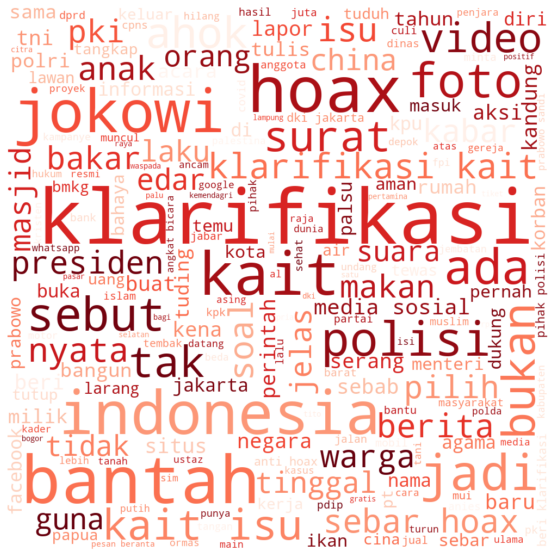

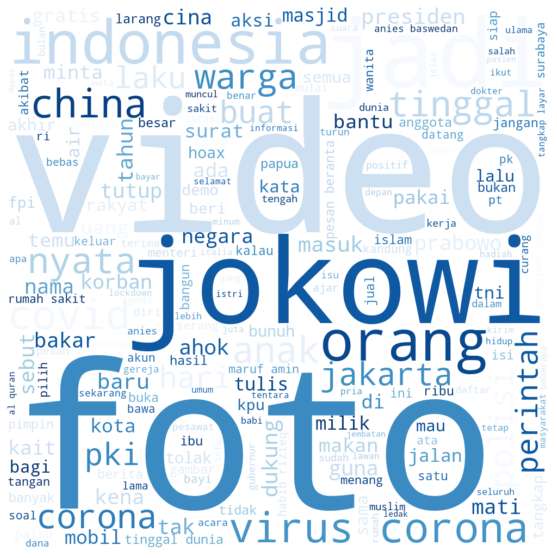

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
 
# Polarity == 0 benar
train_s0 = train[train["label"] == 0]
all_text_s0 = ' '.join(word for word in train_s0["judul_new"])
wordcloud = WordCloud(colormap='Reds', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_text_s0)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()
 
# Polarity == 1 hoax
train_s1 = train[train["label"] == 1]
all_text_s1 = ' '.join(word for word in train_s1["judul_new"])
wordcloud = WordCloud(width=1000, height=1000, colormap='Blues', background_color='white', mode='RGBA').generate(all_text_s1)
plt.figure( figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

In [ ]:
from collections import Counter
counter_s0= Counter(all_text_s0.split()).most_common(20)
counter_s1= Counter(all_text_s1.split()).most_common(20)
print(counter_s0)
print()
print(counter_s1)

[('hoax', 111), ('indonesia', 92), ('jadi', 89), ('sebut', 83), ('ada', 74), ('tidak', 70), ('berita', 62), ('laku', 53), ('orang', 51), ('foto', 48), ('benar', 48), ('bukan', 48), ('sebar', 46), ('kata', 42), ('media', 39), ('sama', 39), ('ini', 37), ('edar', 36), ('satu', 36), ('jokowi', 36)]

[('jadi', 429), ('orang', 406), ('indonesia', 343), ('ada', 234), ('jokowi', 216), ('semua', 204), ('sebut', 199), ('anak', 199), ('virus', 198), ('hari', 195), ('nyata', 188), ('di', 184), ('corona', 184), ('laku', 177), ('buat', 172), ('baru', 170), ('19', 161), ('tinggal', 151), ('satu', 150), ('covid', 148)]


### Kolom Narasi 

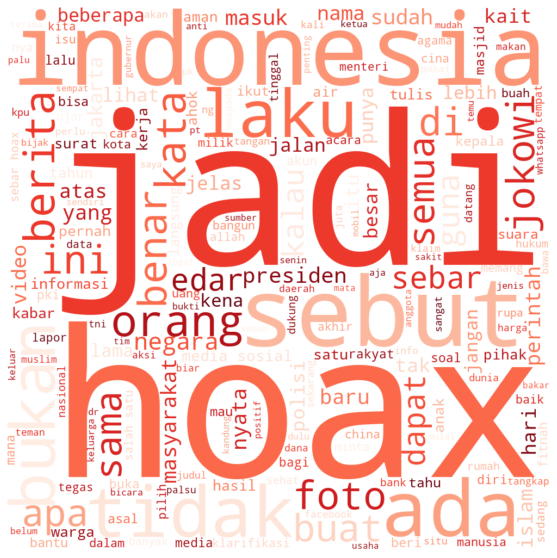

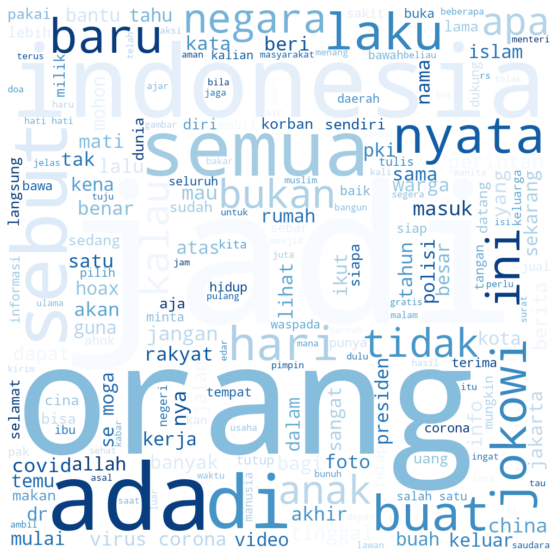

In [ ]:
# Polarity == 0 benar
train_s0 = train[train["label"] == 0]
all_text_s0 = ' '.join(word for word in train_s0["narasi_new"])
wordcloud = WordCloud(colormap='Reds', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_text_s0)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()
 
# Polarity == 1 hoax
train_s1 = train[train["label"] == 1]
all_text_s1 = ' '.join(word for word in train_s1["narasi_new"])
wordcloud = WordCloud(width=1000, height=1000, colormap='Blues', background_color='white', mode='RGBA').generate(all_text_s1)
plt.figure( figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

In [ ]:
counter_s0= Counter(all_text_s0.split()).most_common(20)
counter_s1= Counter(all_text_s1.split()).most_common(20)
print(counter_s0)
print()
print(counter_s1)

[('sebut', 93), ('indonesia', 93), ('jadi', 89), ('hoax', 81), ('ada', 79), ('yg', 70), ('tidak', 70), ('berita', 63), ('laku', 53), ('orang', 51), ('benar', 49), ('foto', 48), ('bukan', 48), ('sebar', 47), ('kata', 42), ('media', 39), ('sama', 39), ('ini', 37), ('edar', 36), ('satu', 36)]

[('yg', 551), ('jadi', 430), ('orang', 405), ('indonesia', 356), ('ada', 238), ('sebut', 220), ('jokowi', 216), ('anak', 199), ('virus', 198), ('hari', 196), ('semua', 196), ('nyata', 188), ('corona', 188), ('di', 184), ('laku', 177), ('buat', 172), ('baru', 169), ('the', 168), ('19', 161), ('tinggal', 151)]


## Feature Extraction 

In [ ]:
 
 
# tokenize helper function
def text_process(raw_text):
    # Check characters to see if they are in punctuation
    nopunc = [char for char in list(raw_text) if char not in string.punctuation]
 
    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
 
vectorizer=CountVectorizer()
vectorizer.fit(train2.judul_new)
X_train = vectorizer.transform(train2.judul_new)
print(X_train.shape)

(2948, 7109)


In [ ]:
X_test = vectorizer.transform(test2.judul_new)
print(X_test.shape)

(1264, 7109)


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
 
tf=TfidfVectorizer(smooth_idf=True, analyzer='word',sublinear_tf=True,stop_words='english')
txtfit=tf.fit(dfBDC.judul_new.values)
Xtr=txtfit.transform(train.judul_new.values)
print(Xtr.shape)

(3369, 8733)


In [ ]:
Xts=txtfit.transform(test.judul_new.values)
print(Xts.shape)

(843, 8733)


In [ ]:
print(vectorizer.get_feature_names()[:10])

['aamiin', 'abai', 'abaka', 'abal', 'abang', 'abd', 'abdul', 'abdulah', 'abdurahman', 'abdurrahman']


In [ ]:
tf.idf_

array([8.24731797, 8.65278308, 8.65278308, ..., 8.24731797, 8.65278308,
       8.65278308])

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer
 
tfidfconverter = TfidfTransformer()
Xtrain= tfidfconverter.fit_transform(X_train)
Xtest= tfidfconverter.transform(X_test)

In [ ]:
y_Train=train2.label
y_Test=test2.label

In [ ]:
X_train

<3384x7990 sparse matrix of type '<class 'numpy.int64'>'
	with 25733 stored elements in Compressed Sparse Row format>